<a href="https://colab.research.google.com/github/frances300/Image-Classifier-Project/blob/main/Copy_of_AIPND_image_classifier_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AI Programming with Python Nanodegree: Image Classifier Project
  - Do not make changes to the first 2 code cells, they are being used for setting up the `flowers` dataset and `cat_to_name.json`. Start writing code from third code cell onwards.
  - To use this notebook: `File > Save a copy in Drive`
  

### Code Explanation:

- **Setting Up Flower Dataset:**
  - `data_dir = './flowers'`: Defines the directory path for the flower dataset.
  - `FLOWERS_DIR = Path(data_dir)`: Uses `Path` from `pathlib` for handling PosixPath.

- **Downloading and Extracting Dataset:**
  - `if not FLOWERS_DIR.is_dir()`: Checks if the dataset directory exists.
    - `FLOWERS_DIR.mkdir(parents=True, exist_ok=True)`: Creates the directory if not present.
  - `TARBALL = FLOWERS_DIR / "flower_data.tar.gz"`: Defines the tarball path.
  - Downloads and extracts the dataset if not already present:
    - `request = requests.get(...)`: Downloads the 'flower_data.tar.gz' file.
    - `with open(TARBALL, "wb") as file_ref`: Writes the downloaded content to the tarball.
    - `with tarfile.open(TARBALL, "r") as tar_ref`: Extracts the tarball contents to the dataset directory.

- **Cleaning Up:**
  - `os.remove(TARBALL)`: Deletes the downloaded tarball to save space.

- **Status Messages:**
  - Prints informative messages about the directory creation, download, extraction, and cleanup.


In [1]:
# imports
import os
import requests
from pathlib import Path
import tarfile

# defining dataset directory
data_dir = './flowers'

# using pathlib.Path for handling PosixPath
FLOWERS_DIR = Path(data_dir)

# downloading and setting up data if not already present
if not FLOWERS_DIR.is_dir():
    # creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print() # for readability

    # tarball path
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # downloading and writing the tarball to './flowers' directory
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print() # for readability

    # extracting the downloaded tarball
    print(f"[INFO] Extracting the downloaded tarball to ./{FLOWERS_DIR}")
    with tarfile.open(TARBALL, "r") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)
        print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")

    print() # for readability

    # using os.remove to delete the downloaded tarball
    print("[INFO] Deleting the tarball to save space.")
    os.remove(TARBALL)
else:
    print(f"[INFO] Dataset already setup at ./{FLOWERS_DIR}")

[INFO] Directory created: ./flowers

[INFO] Downloading the file 'flower_data.tar.gz' to ./flowers
[INFO] 'flower_data.tar.gz' saved to ./flowers

[INFO] Extracting the downloaded tarball to ./flowers
[INFO] 'flower_data.tar.gz' extracted successfully to ./flowers

[INFO] Deleting the tarball to save space.


### Code Explanation:

- **Creating a JSON File for Flower Categories:**
  - `data`: Defines a dictionary containing numerical keys and corresponding flower names.
  - `with open('cat_to_name.json', 'w') as file`: Opens the file 'cat_to_name.json' for writing.
  - `json.dump(data, file)`: Writes the dictionary data to the JSON file.

- **Interpreting the Output:**
  - The code creates a JSON file named 'cat_to_name.json' that serves as a mapping between numerical keys and flower names. This mapping can be useful for associating numerical labels with human-readable names in machine learning tasks.


In [2]:
import json

data = {
    "21": "fire lily", "3": "canterbury bells", "45": "bolero deep blue", "1": "pink primrose", "34": "mexican aster",
    "27": "prince of wales feathers", "7": "moon orchid", "16": "globe-flower", "25": "grape hyacinth", "26": "corn poppy",
    "79": "toad lily", "39": "siam tulip", "24": "red ginger", "67": "spring crocus", "35": "alpine sea holly",
    "32": "garden phlox", "10": "globe thistle", "6": "tiger lily", "93": "ball moss", "33": "love in the mist",
    "9": "monkshood", "102": "blackberry lily", "14": "spear thistle", "19": "balloon flower", "100": "blanket flower",
    "13": "king protea", "49": "oxeye daisy", "15": "yellow iris", "61": "cautleya spicata", "31": "carnation",
    "64": "silverbush", "68": "bearded iris", "63": "black-eyed susan", "69": "windflower", "62": "japanese anemone",
    "20": "giant white arum lily", "38": "great masterwort", "4": "sweet pea", "86": "tree mallow",
    "101": "trumpet creeper", "42": "daffodil", "22": "pincushion flower", "2": "hard-leaved pocket orchid",
    "54": "sunflower", "66": "osteospermum", "70": "tree poppy", "85": "desert-rose", "99": "bromelia", "87": "magnolia",
    "5": "english marigold", "92": "bee balm", "28": "stemless gentian", "97": "mallow", "57": "gaura",
    "40": "lenten rose", "47": "marigold", "59": "orange dahlia", "48": "buttercup", "55": "pelargonium",
    "36": "ruby-lipped cattleya", "91": "hippeastrum", "29": "artichoke", "71": "gazania", "90": "canna lily",
    "18": "peruvian lily", "98": "mexican petunia", "8": "bird of paradise", "30": "sweet william",
    "17": "purple coneflower", "52": "wild pansy", "84": "columbine", "12": "colt's foot", "11": "snapdragon",
    "96": "camellia", "23": "fritillary", "50": "common dandelion", "44": "poinsettia", "53": "primula",
    "72": "azalea", "65": "californian poppy", "80": "anthurium", "76": "morning glory", "37": "cape flower",
    "56": "bishop of llandaff", "60": "pink-yellow dahlia", "82": "clematis", "58": "geranium", "75": "thorn apple",
    "41": "barbeton daisy", "95": "bougainvillea", "43": "sword lily", "83": "hibiscus", "78": "lotus lotus",
    "88": "cyclamen", "94": "foxglove", "81": "frangipani", "74": "rose", "89": "watercress", "73": "water lily",
    "46": "wallflower", "77": "passion flower", "51": "petunia"
}

with open('cat_to_name.json', 'w') as file:
    json.dump(data, file)

In [3]:
# Imports here
import torch
import torchvision
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import json
from torch.utils.data import DataLoader

In [4]:
#load the data set
data_dir = 'flowers'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'

In [5]:
# TODO: Define your transforms for the training, validation, and testing sets
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),   # Random resizing and cropping
        transforms.RandomHorizontalFlip(),    # Random horizontal flip
        transforms.ToTensor(),                # Convert the image to a tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize based on ImageNet stats
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),              # Resize image
        transforms.CenterCrop(224),          # Crop center to 224x224
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
}

# TODO: Load the datasets with ImageFolder
image_datasets = {x: datasets.ImageFolder(eval(f"{x}_dir"), data_transforms[x]) for x in ['train', 'valid', 'test']}

# TODO: Using the image datasets and the trainforms, define the dataloaders
dataloaders = {x: DataLoader(image_datasets[x], batch_size=32, shuffle=True) for x in ['train', 'valid', 'test']}

In [6]:
# TODO: Build and train your network
# Label Mapping
import json

# Load the label mapping
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)

# Check the first few entries to confirm it worked
print(cat_to_name)

{'21': 'fire lily', '3': 'canterbury bells', '45': 'bolero deep blue', '1': 'pink primrose', '34': 'mexican aster', '27': 'prince of wales feathers', '7': 'moon orchid', '16': 'globe-flower', '25': 'grape hyacinth', '26': 'corn poppy', '79': 'toad lily', '39': 'siam tulip', '24': 'red ginger', '67': 'spring crocus', '35': 'alpine sea holly', '32': 'garden phlox', '10': 'globe thistle', '6': 'tiger lily', '93': 'ball moss', '33': 'love in the mist', '9': 'monkshood', '102': 'blackberry lily', '14': 'spear thistle', '19': 'balloon flower', '100': 'blanket flower', '13': 'king protea', '49': 'oxeye daisy', '15': 'yellow iris', '61': 'cautleya spicata', '31': 'carnation', '64': 'silverbush', '68': 'bearded iris', '63': 'black-eyed susan', '69': 'windflower', '62': 'japanese anemone', '20': 'giant white arum lily', '38': 'great masterwort', '4': 'sweet pea', '86': 'tree mallow', '101': 'trumpet creeper', '42': 'daffodil', '22': 'pincushion flower', '2': 'hard-leaved pocket orchid', '54': 's

In [7]:
from torchvision import models
import torch.nn as nn

# Load the pre-trained VGG16 model
model = models.vgg16(pretrained=True)

# Freeze all the parameters so that the weights don't change during training
for param in model.parameters():
    param.requires_grad = False

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:07<00:00, 72.5MB/s]


In [8]:
# Modify the fully connected classifier part of the VGG16 model
model.classifier[6] = nn.Sequential(
    nn.Linear(4096, 1024),  # Adjusting this layer to take 4096 from previous layer
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(1024, 102),  # Output layer for 102 flower classes
    nn.LogSoftmax(dim=1)  # Softmax activation for multi-class classification
)

In [9]:
from torchvision import models
import torch.nn as nn
import torch.optim as optim
import torch

# Load the pre-trained VGG16 model
model = models.vgg16(pretrained=True)

# Freeze all the parameters so that the weights don't change during training
for param in model.parameters():
    param.requires_grad = False

# Modify the fully connected classifier part of the VGG16 model
model.classifier[6] = nn.Sequential(
    nn.Linear(4096, 1024),  # Adjusting this layer to take 4096 from previous layer
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(1024, 102),  # Output layer for 102 flower classes
    nn.LogSoftmax(dim=1)  # Softmax activation for multi-class classification
)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [10]:
# Define the loss function (CrossEntropyLoss for multi-class classification)
criterion = nn.CrossEntropyLoss()

# Define the optimizer (Adam optimizer for classifier parameters)
optimizer = optim.Adam(model.classifier.parameters(), lr=0.003)


In [11]:
# Number of epochs for training
epochs = 5
steps = 0
running_loss = 0
print_every = 40

# Loop through the dataset for the specified number of epochs
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    for inputs, labels in dataloaders['train']:
        steps += 1
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the gradients before backpropagation

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Print loss every `print_every` steps
        if steps % print_every == 0:
            model.eval()  # Set the model to evaluation mode to track accuracy on validation set
            valid_loss = 0
            accuracy = 0

            # Turn off gradients for validation
            with torch.no_grad():
                for inputs, labels in dataloaders['valid']:
                    inputs, labels = inputs.to(device), labels.to(device)

                    # Forward pass
                    outputs = model(inputs)
                    valid_loss += criterion(outputs, labels).item()

                    # Calculate accuracy
                    ps = torch.exp(outputs)  # Convert log probabilities to probabilities
                    top_p, top_class = ps.topk(1, dim=1)
                    correct = top_class == labels.view(*top_class.shape)
                    accuracy += correct.sum().item()

            # Print statistics
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Validation loss: {valid_loss/len(dataloaders['valid']):.3f}.. "
                  f"Validation accuracy: {accuracy/len(dataloaders['valid'].dataset):.3f}")
            running_loss = 0
            model.train()  # Set the model back to training mode

Epoch 1/5.. Train loss: 3.778.. Validation loss: 2.427.. Validation accuracy: 0.461
Epoch 1/5.. Train loss: 2.476.. Validation loss: 1.725.. Validation accuracy: 0.549
Epoch 1/5.. Train loss: 2.014.. Validation loss: 1.209.. Validation accuracy: 0.656
Epoch 1/5.. Train loss: 1.842.. Validation loss: 1.311.. Validation accuracy: 0.627
Epoch 1/5.. Train loss: 1.873.. Validation loss: 1.127.. Validation accuracy: 0.700
Epoch 2/5.. Train loss: 1.594.. Validation loss: 0.998.. Validation accuracy: 0.748
Epoch 2/5.. Train loss: 1.608.. Validation loss: 1.034.. Validation accuracy: 0.710
Epoch 2/5.. Train loss: 1.677.. Validation loss: 1.198.. Validation accuracy: 0.682
Epoch 2/5.. Train loss: 1.597.. Validation loss: 1.001.. Validation accuracy: 0.736
Epoch 2/5.. Train loss: 1.596.. Validation loss: 1.043.. Validation accuracy: 0.720
Epoch 3/5.. Train loss: 1.604.. Validation loss: 0.916.. Validation accuracy: 0.763
Epoch 3/5.. Train loss: 1.629.. Validation loss: 0.983.. Validation accuracy

Testing your network
It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. Run the test images through the network and measure the accuracy, the same way you did validation. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [12]:
# TODO: Do validation on the test set

In [13]:
# Testing the model on the test dataset
model.eval()  # Set the model to evaluation mode
test_accuracy = 0

with torch.no_grad():
    for inputs, labels in dataloaders['test']:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        ps = torch.exp(outputs)
        top_p, top_class = ps.topk(1, dim=1)
        correct = top_class == labels.view(*top_class.shape)
        test_accuracy += correct.sum().item()

print(f"Test accuracy: {test_accuracy / len(dataloaders['test'].dataset):.3f}")

Test accuracy: 0.772


Save the checkpoint
Now that your network is trained, save the model so you can load it later for making predictions. You probably want to save other things such as the mapping of classes to indices which you get from one of the image datasets: image_datasets['train'].class_to_idx. You can attach this to the model as an attribute which makes inference easier later on.

model.class_to_idx = image_datasets['train'].class_to_idx

Remember that you'll want to completely rebuild the model later so you can use it for inference. Make sure to include any information you need in the checkpoint. If you want to load the model and keep training, you'll want to save the number of epochs as well as the optimizer state, optimizer.state_dict. You'll likely want to use this trained model in the next part of the project, so best to save it now.

In [14]:
# TODO: Save the checkpoint

In [15]:

# Save the model checkpoint
checkpoint = {
    'state_dict': model.state_dict(),
    'class_to_idx': image_datasets['train'].class_to_idx,
    'optimizer_dict': optimizer.state_dict()
}

torch.save(checkpoint, 'flower_classifier.pth')

Loading the checkpoint
At this point it's good to write a function that can load a checkpoint and rebuild the model. That way you can come back to this project and keep working on it without having to retrain the network.

In [16]:
# TODO: Write a function that loads a checkpoint and rebuilds the model

In [17]:
import torch
import torch.nn as nn
from torchvision import models

# Define the model architecture to match the saved model
class VGG16_FC(nn.Module):
    def __init__(self, num_classes):
        super(VGG16_FC, self).__init__()
        # Load VGG16 without extra wrapper
        vgg16 = models.vgg16(weights='DEFAULT')

        # Extract features and classifier
        self.features = vgg16.features  # No extra "self.model" wrapper
        self.classifier = vgg16.classifier

        # Modify last fully connected layer to match num_classes
        self.classifier[6] = nn.Linear(4096, num_classes)

    def forward(self, x):
        x = self.features(x)  # Ensure features are used directly
        x = torch.flatten(x, 1)  # Flatten before classifier
        x = self.classifier(x)
        return x

# Function to load the checkpoint and rebuild the model
def load_checkpoint(filepath):
    # Load the checkpoint
    checkpoint = torch.load(filepath, map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

    # Get number of classes from checkpoint
    num_classes = len(checkpoint['class_to_idx'])

    # Initialize the model with the correct number of classes
    model = VGG16_FC(num_classes)

    # Load the saved model weights
    model.load_state_dict(checkpoint['state_dict'], strict=True)  # Match exactly

    # Restore the class-to-index mapping
    model.class_to_idx = checkpoint['class_to_idx']

    # Set the model to evaluation mode
    model.eval()

    return model

Inference for classification
Now you'll write a function to use a trained network for inference. That is, you'll pass an image into the network and predict the class of the flower in the image. Write a function called predict that takes an image and a model, then returns the top  𝐾
  most likely classes along with the probabilities. It should look like

probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
First you'll need to handle processing the input image such that it can be used in your network.

Image Preprocessing
You'll want to use PIL to load the image (documentation). It's best to write a function that preprocesses the image so it can be used as input for the model. This function should process the images in the same manner used for training.

First, resize the images where the shortest side is 256 pixels, keeping the aspect ratio. This can be done with the thumbnail or resize methods. Then you'll need to crop out the center 224x224 portion of the image.

Color channels of images are typically encoded as integers 0-255, but the model expected floats 0-1. You'll need to convert the values. It's easiest with a Numpy array, which you can get from a PIL image like so np_image = np.array(pil_image).

As before, the network expects the images to be normalized in a specific way. For the means, it's [0.485, 0.456, 0.406] and for the standard deviations [0.229, 0.224, 0.225]. You'll want to subtract the means from each color channel, then divide by the standard deviation.

And finally, PyTorch expects the color channel to be the first dimension but it's the third dimension in the PIL image and Numpy array. You can reorder dimensions using ndarray.transpose. The color channel needs to be first and retain the order of the other two dimensions.

In [18]:
from PIL import Image
import numpy as np

def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returning a Numpy array
    '''

    # Open the image
    pil_image = Image.open(image)

    # Resize the image so the shortest side is 256 pixels
    # Calculate the ratio to maintain aspect ratio
    size = 256
    pil_image = pil_image.resize((size, size), Image.ANTIALIAS)  # Use resize for specific dimensions

    # Crop the center 224x224 portion of the image
    left = (pil_image.width - 224) / 2
    top = (pil_image.height - 224) / 2
    right = (pil_image.width + 224) / 2
    bottom = (pil_image.height + 224) / 2
    pil_image = pil_image.crop((left, top, right, bottom))

    # Convert the image to a numpy array
    np_image = np.array(pil_image)

    # Normalize the image
    # Convert to float, normalize with mean and std (ImageNet)
    np_image = np_image / 255.0  # Scale from 0-255 to 0-1
    mean = np.array([0.485, 0.456, 0.406])  # Mean of ImageNet data
    std = np.array([0.229, 0.224, 0.225])   # Std of ImageNet data
    np_image = (np_image - mean) / std

    # Reorder dimensions to be in PyTorch format: (C, H, W)
    np_image = np_image.transpose((2, 0, 1))

    return np_image

To check your work, the function below converts a PyTorch tensor and displays it in the notebook. If your process_image function works, running the output through this function should return the original image (except for the cropped out portions).

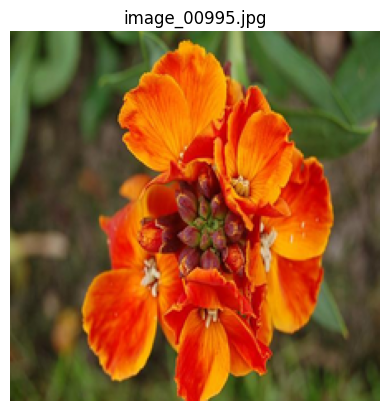

In [19]:
import os
import requests
import tarfile
import json
from pathlib import Path
from PIL import Image
import numpy as np
import torch
import matplotlib.pyplot as plt

# Setting up data directory
data_dir = './flowers'
FLOWERS_DIR = Path(data_dir)

# Downloading and extracting data if not already present
if not FLOWERS_DIR.is_dir():
    # Creating directory
    FLOWERS_DIR.mkdir(parents=True, exist_ok=True)
    print(f"[INFO] Directory created: ./{FLOWERS_DIR}")

    print()  # for readability
    TARBALL = FLOWERS_DIR / "flower_data.tar.gz"

    # Downloading
    print(f"[INFO] Downloading the file 'flower_data.tar.gz' to ./{FLOWERS_DIR}")
    request = requests.get('https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz')
    with open(TARBALL, "wb") as file_ref:
        file_ref.write(request.content)
        print(f"[INFO] 'flower_data.tar.gz' saved to ./{FLOWERS_DIR}")

    print()  # for readability
    print(f"[INFO] Extracting the downloaded tarball.")
    with tarfile.open(TARBALL, "r:gz") as tar_ref:
        tar_ref.extractall(FLOWERS_DIR)

    print(f"[INFO] 'flower_data.tar.gz' extracted successfully to ./{FLOWERS_DIR}")
    os.remove(TARBALL)

# Define paths for training data
train_dir = FLOWERS_DIR / 'train'
valid_dir = FLOWERS_DIR / 'valid'
test_dir = FLOWERS_DIR / 'test'

# Function to process an image
def process_image(image_path):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns a Numpy array.
    '''
    # TODO: Process a PIL image for use in a PyTorch model
    pil_image = Image.open(image_path)

    # Resize the image to 256x256 using LANCZOS for high-quality downsampling
    pil_image = pil_image.resize((256, 256), Image.LANCZOS)

    # Crop the center 224x224 portion of the image
    left = (pil_image.width - 224) / 2
    top = (pil_image.height - 224) / 2
    right = (pil_image.width + 224) / 2
    bottom = (pil_image.height + 224) / 2
    pil_image = pil_image.crop((left, top, right, bottom))

    # Convert to numpy array and normalize
    np_image = np.array(pil_image) / 255.0
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    np_image = (np_image - mean) / std
    np_image = np_image.transpose((2, 0, 1))  # Convert to (C, H, W)

    return np_image

# Function to display an image
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()

    # Convert the PyTorch tensor to a NumPy array and transpose
    image = image.numpy().transpose((1, 2, 0))

    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Clip values to be between 0 and 1
    image = np.clip(image, 0, 1)

    # Display the image
    ax.imshow(image)
    if title is not None:
        ax.set_title(title)
    ax.axis('off')  # Turn off axis numbers and ticks

    return ax

# Select an image randomly from the training dataset
# For demonstration, we'll get the first flower image in the directory.
flower_classes = os.listdir(train_dir)
first_class = flower_classes[0]
first_image_path = list((train_dir / first_class).glob('*.jpg'))[0]  # Get the first image in the first class

# Process and display the image
processed_image = process_image(first_image_path)

# Convert processed image back to a tensor for display
image_tensor = torch.tensor(processed_image)

# Use imshow to display the processed image
imshow(image_tensor, title=first_image_path.name)
plt.show()

Class Prediction
Once you can get images in the correct format, it's time to write a function for making predictions with your model. A common practice is to predict the top 5 or so (usually called top- 𝐾
 ) most probable classes. You'll want to calculate the class probabilities then find the  𝐾
  largest values.

To get the top  𝐾
  largest values in a tensor use x.topk(k). This method returns both the highest k probabilities and the indices of those probabilities corresponding to the classes. You need to convert from these indices to the actual class labels using class_to_idx which hopefully you added to the model or from an ImageFolder you used to load the data (see here). Make sure to invert the dictionary so you get a mapping from index to class as well.

Again, this method should take a path to an image and a model checkpoint, then return the probabilities and classes.

probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']

In [20]:
import torch
import torch.nn as nn
from torchvision import models

# Define the custom model architecture
class VGG16_FC(nn.Module):
    def __init__(self, num_classes):
        super(VGG16_FC, self).__init__()
        self.model = models.vgg16(weights="DEFAULT")  # Updated for new torchvision versions
        self.model.classifier[6] = nn.Linear(4096, num_classes)  # Modify the last layer

    def forward(self, x):
        return self.model(x)

# Function to load the trained model checkpoint
def load_checkpoint(filepath):
    """
    Loads a model from a checkpoint file.
    """
    # Load checkpoint
    checkpoint = torch.load(filepath, map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu"))

    # Extract number of classes from checkpoint
    num_classes = len(checkpoint["class_to_idx"])

    # Initialize the model
    model = VGG16_FC(num_classes)

    # Load the trained weights
    model.load_state_dict(checkpoint["state_dict"], strict=False)

    # Restore class-to-index mapping
    model.class_to_idx = checkpoint["class_to_idx"]

    # Set the model to evaluation mode
    model.eval()

    return model


In [21]:
from torchvision import transforms
from PIL import Image

# Function to preprocess the image
def process_image(image_path):
    """
    Preprocess an image:
    - Resize
    - Center crop
    - Convert to tensor
    - Normalize
    """
    preprocess = transforms.Compose([
        transforms.Resize(256),          # Resize image to 256 pixels on the shorter side
        transforms.CenterCrop(224),      # Crop the center 224x224 region
        transforms.ToTensor(),           # Convert image to tensor
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
    ])

    image = Image.open(image_path).convert("RGB")  # Ensure RGB format
    return preprocess(image).unsqueeze(0)  # Add batch dimension


In [22]:
def predict(image_path, model, top_k=5):
    """
    Predicts the top-K classes of an image.
    """
    model.eval()  # Set model to evaluation mode
    image_tensor = process_image(image_path)  # Preprocess image

    # Move to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    image_tensor = image_tensor.to(device)

    # Get model predictions
    with torch.no_grad():
        outputs = model(image_tensor)

    # Convert logits to probabilities
    probs = torch.nn.functional.softmax(outputs, dim=1)

    # Get top-K probabilities and indices
    top_probs, top_indices = probs.topk(top_k)

    # Convert tensors to numpy
    top_probs = top_probs.cpu().numpy()[0]
    top_indices = top_indices.cpu().numpy()[0]

    # Invert class_to_idx mapping to get index-to-class
    idx_to_class = {v: k for k, v in model.class_to_idx.items()}

    # Get class labels from indices
    top_classes = [idx_to_class[i] for i in top_indices]

    return top_probs, top_classes

In [23]:
# Load the trained model from checkpoint
model = load_checkpoint("flower_classifier.pth")

# Define the image path
image_path = './flowers/train/73/image_00418.jpg'  # Change this to your image

# Predict top-5 classes
probs, classes = predict(image_path, model)

# Print the results
print("Probabilities:", probs)
print("Classes:", classes)

Probabilities: [0.01634735 0.01583006 0.01515844 0.01490391 0.01432889]
Classes: ['99', '81', '57', '27', '59']
